# Series temporáis

 - Dados coletados em um intervalo de tempo regular, exemplo: mensalmente
 - Ordenado por intervalo de tempo
 - Supõe-se que os intervalos de tempo sejam dependentes entre si
 - Usado para prever dados em um intervalo de tempo
 - Dividido em 
   - Estacionárias: flutuam em torno de uma mesma média e variância
   - Não-estacionárias
 - Podem ser
   - Estocásticas: aqui os dados são definido por um fator aleátorio nos dados, que não pode ser explicado + formula
   - Determinísticas: explicadas através de uma formula/função
 - Componentes
   - Tendência
   - Sazonalidade
   - Aleatoriedade
 - Ciclos
   - São variações que não podem ser relacionadas com o intervalo de tempo
   - As consequências do ciclo podem ser explicados
   - Exemplo: crises econômicas, desastres naturais, etcs...

In [4]:
import pandas as pandas
import numpy as numpy
import matplotlib.pyplot  as plt
from datetime import datetime
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.arima_model import ARIMA
from pmdarima.arima import auto_arima

### Explorando

In [5]:
base = pandas.read_csv("data/AirPassengers.csv")
base.head()

,Month,#Passengers
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121


In [6]:
base.dtypes

Month          object
#Passengers     int64
dtype: object

In [7]:
dateParse = lambda dates: pandas.datetime.strptime(dates, '%Y-%m')
base = pandas.read_csv("data/AirPassengers.csv", parse_dates = ["Month"],
                       index_col = "Month", date_parser=dateParse)
base.head()

,#Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


In [8]:
base.dtypes

#Passengers    int64
dtype: object

In [9]:
base.index

DatetimeIndex(['1949-01-01', '1949-02-01', '1949-03-01', '1949-04-01',
               '1949-05-01', '1949-06-01', '1949-07-01', '1949-08-01',
               '1949-09-01', '1949-10-01',
               ...
               '1960-03-01', '1960-04-01', '1960-05-01', '1960-06-01',
               '1960-07-01', '1960-08-01', '1960-09-01', '1960-10-01',
               '1960-11-01', '1960-12-01'],
              dtype='datetime64[ns]', name='Month', length=144, freq=None)

In [11]:
serie = base['#Passengers']
serie[:6]

Month
1949-01-01    112
1949-02-01    118
1949-03-01    132
1949-04-01    129
1949-05-01    121
1949-06-01    135
Name: #Passengers, dtype: int64

In [13]:
serie[1]

118

In [14]:
serie['1949-02']

Month
1949-02-01    118
Name: #Passengers, dtype: int64

In [15]:
serie['1949-02-01']

118

In [16]:
serie[datetime(1949,2,1)]

118

In [17]:
serie['1950-01-01':'1950-07-31']

Month
1950-01-01    115
1950-02-01    126
1950-03-01    141
1950-04-01    135
1950-05-01    125
1950-06-01    149
1950-07-01    170
Name: #Passengers, dtype: int64

In [18]:
serie[:'1950-07-31']

Month
1949-01-01    112
1949-02-01    118
1949-03-01    132
1949-04-01    129
1949-05-01    121
1949-06-01    135
1949-07-01    148
1949-08-01    148
1949-09-01    136
1949-10-01    119
1949-11-01    104
1949-12-01    118
1950-01-01    115
1950-02-01    126
1950-03-01    141
1950-04-01    135
1950-05-01    125
1950-06-01    149
1950-07-01    170
Name: #Passengers, dtype: int64

In [19]:
serie['1950']

Month
1950-01-01    115
1950-02-01    126
1950-03-01    141
1950-04-01    135
1950-05-01    125
1950-06-01    149
1950-07-01    170
1950-08-01    170
1950-09-01    158
1950-10-01    133
1950-11-01    114
1950-12-01    140
Name: #Passengers, dtype: int64

In [20]:
serie.index.max()

Timestamp('1960-12-01 00:00:00')

In [21]:
serie.index.min()

Timestamp('1949-01-01 00:00:00')

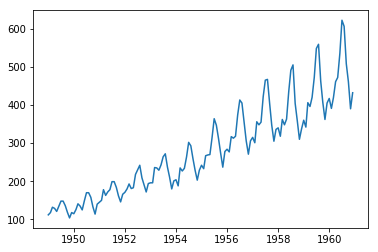

In [22]:
plt.plot(serie)

In [23]:
serie_ano = serie.groupby([lambda x: x.year]).sum()
serie_ano

1949    1520
1950    1676
1951    2042
1952    2364
1953    2700
1954    2867
1955    3408
1956    3939
1957    4421
1958    4572
1959    5140
1960    5714
Name: #Passengers, dtype: int64

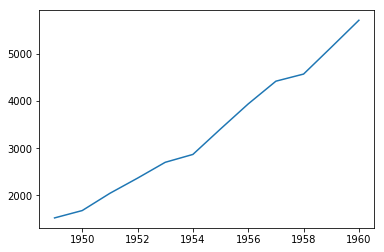

In [24]:
plt.plot(serie_ano)

In [25]:
serie_mes = serie.groupby([lambda x: x.month]).sum()
serie_mes

1     2901
2     2820
3     3242
4     3205
5     3262
6     3740
7     4216
8     4213
9     3629
10    3199
11    2794
12    3142
Name: #Passengers, dtype: int64

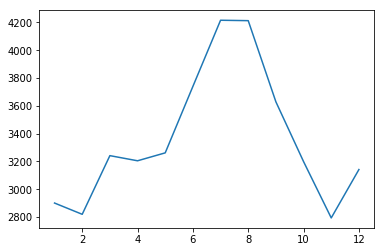

In [26]:
plt.plot(serie_mes)

In [29]:
serie_datas = serie['1960-01-01': '1960-12-01']
serie_datas

Month
1960-01-01    417
1960-02-01    391
1960-03-01    419
1960-04-01    461
1960-05-01    472
1960-06-01    535
1960-07-01    622
1960-08-01    606
1960-09-01    508
1960-10-01    461
1960-11-01    390
1960-12-01    432
Name: #Passengers, dtype: int64

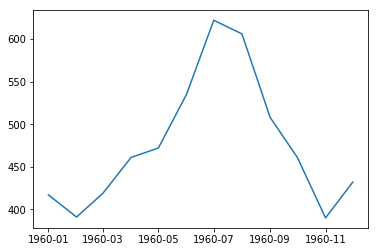

In [30]:
plt.plot(serie_datas)

 ### Decomposição


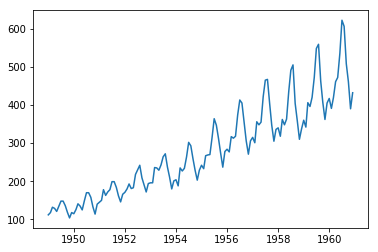

In [31]:
plt.plot(serie)

In [34]:
decomposicao = seasonal_decompose(serie)
tendencia = decomposicao.trend
tendencia[:10]

Month
1949-01-01           NaN
1949-02-01           NaN
1949-03-01           NaN
1949-04-01           NaN
1949-05-01           NaN
1949-06-01           NaN
1949-07-01    126.791667
1949-08-01    127.250000
1949-09-01    127.958333
1949-10-01    128.583333
Name: #Passengers, dtype: float64

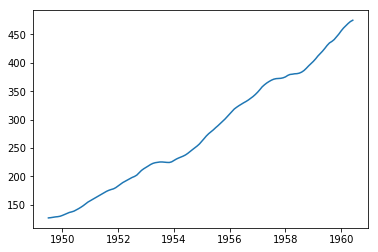

In [35]:
plt.plot(tendencia)

In [36]:
sazonal = decomposicao.seasonal
sazonal[:10]

Month
1949-01-01   -24.748737
1949-02-01   -36.188131
1949-03-01    -2.241162
1949-04-01    -8.036616
1949-05-01    -4.506313
1949-06-01    35.402778
1949-07-01    63.830808
1949-08-01    62.823232
1949-09-01    16.520202
1949-10-01   -20.642677
Name: #Passengers, dtype: float64

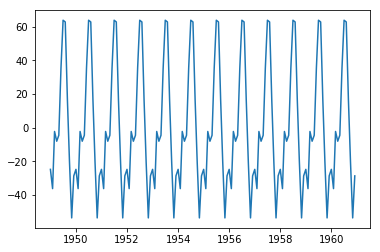

In [37]:
plt.plot(sazonal)

In [38]:
aleatorio = decomposicao.resid
aleatorio[:10]

Month
1949-01-01          NaN
1949-02-01          NaN
1949-03-01          NaN
1949-04-01          NaN
1949-05-01          NaN
1949-06-01          NaN
1949-07-01   -42.622475
1949-08-01   -42.073232
1949-09-01    -8.478535
1949-10-01    11.059343
Name: #Passengers, dtype: float64

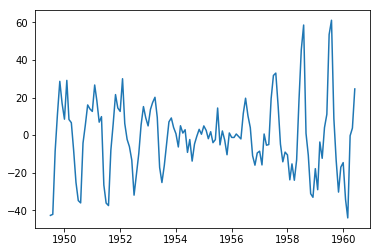

In [39]:
plt.plot(aleatorio)

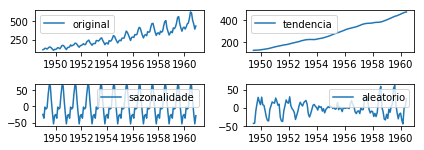

In [40]:
plt.subplot(4,2,1)
plt.plot(serie, label="original")
plt.legend(loc='best')

plt.subplot(4,2,2)
plt.plot(tendencia, label="tendencia")
plt.legend(loc='best')

plt.subplot(4,2,3)
plt.plot(sazonal, label="sazonalidade")
plt.legend(loc='best')

plt.subplot(4,2,4)
plt.plot(aleatorio, label="aleatorio")
plt.legend(loc='best')

plt.tight_layout()

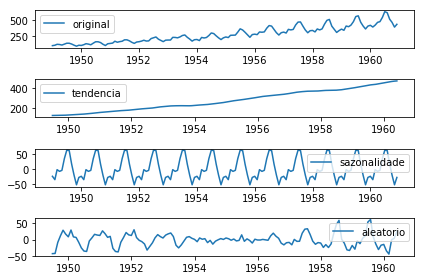

In [41]:
plt.subplot(4,1,1)
plt.plot(serie, label="original")
plt.legend(loc='best')

plt.subplot(4,1,2)
plt.plot(tendencia, label="tendencia")
plt.legend(loc='best')

plt.subplot(4,1,3)
plt.plot(sazonal, label="sazonalidade")
plt.legend(loc='best')

plt.subplot(4,1,4)
plt.plot(aleatorio, label="aleatorio")
plt.legend(loc='best')

plt.tight_layout()

 ### Previsao
   - Média movel: faz a media de cada data, tomando como base o proprio valor + os 11 valores anteriores a ela na serie original

In [42]:
media_movel = serie.rolling(window=12).mean()
media_movel[:15]

Month
1949-01-01           NaN
1949-02-01           NaN
1949-03-01           NaN
1949-04-01           NaN
1949-05-01           NaN
1949-06-01           NaN
1949-07-01           NaN
1949-08-01           NaN
1949-09-01           NaN
1949-10-01           NaN
1949-11-01           NaN
1949-12-01    126.666667
1950-01-01    126.916667
1950-02-01    127.583333
1950-03-01    128.333333
Name: #Passengers, dtype: float64

In [43]:
serie[0:12].mean()

126.66666666666667

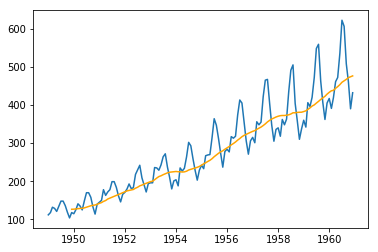

In [44]:
plt.plot(serie)
plt.plot(media_movel, color="orange")

In [45]:
# previsao do ano seguinte usando medias móveis
previsoes = []
for i in range(1,13):
    
    superior = len(media_movel) - i
    inferior = superior - 11
    
    previsoes.append(media_movel[inferior:superior].mean())

In [46]:
previsoes

[453.52272727272737,
 449.37878787878793,
 444.9318181818182,
 440.5,
 436.04545454545456,
 431.5,
 427.1060606060606,
 422.75757575757575,
 418.52272727272725,
 414.34848484848493,
 409.90909090909093,
 405.50757575757575]

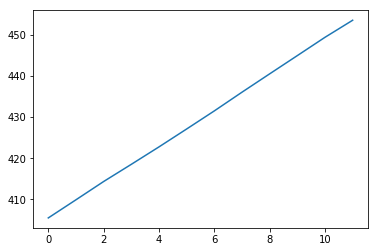

In [49]:
previsoes = previsoes[::-1]
plt.plot(previsoes)

 - Usando o método Arima

In [51]:
# m = 12, pois é mensal
modelo_auto = auto_arima(serie, m = 12, seasonal = True, trace = True)
# calcula o melhor conjunto de paramentros para passar no order=(), do ARIMA
modelo_auto.summary()

/home/obi-wan/python_environments/jupyter/lib/python3.5/site-packages/pmdarima/arima/auto.py:870: ModelFitWarning: Unable to fit ARIMA for order=(2, 1, 2) seasonal_order=(1, 0, 1, 12); data is likely non-stationary. (if you do not want to see these warnings, run with error_action="ignore")
  ModelFitWarning)
/home/obi-wan/python_environments/jupyter/lib/python3.5/site-packages/statsmodels/tsa/statespace/representation.py:375: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return matrix[[slice(None)]*(matrix.ndim-1) + [0]]


Fit ARIMA: order=(2, 1, 2) seasonal_order=(1, 0, 1, 12); AIC=nan, BIC=nan, Fit time=nan seconds
Fit ARIMA: order=(0, 1, 0) seasonal_order=(0, 0, 0, 12); AIC=1415.278, BIC=1421.203, Fit time=0.247 seconds
Fit ARIMA: order=(1, 1, 0) seasonal_order=(1, 0, 0, 12); AIC=nan, BIC=nan, Fit time=nan seconds


/home/obi-wan/python_environments/jupyter/lib/python3.5/site-packages/pmdarima/arima/auto.py:870: ModelFitWarning: Unable to fit ARIMA for order=(1, 1, 0) seasonal_order=(1, 0, 0, 12); data is likely non-stationary. (if you do not want to see these warnings, run with error_action="ignore")
  ModelFitWarning)
/home/obi-wan/python_environments/jupyter/lib/python3.5/site-packages/statsmodels/tsa/statespace/representation.py:375: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return matrix[[slice(None)]*(matrix.ndim-1) + [0]]
/home/obi-wan/python_environments/jupyter/lib/python3.5/site-packages/pmdarima/arima/auto.py:870: ModelFitWarning: Unable to fit ARIMA for order=(0, 1, 1) seasonal_order=(1, 0, 1, 12); data is likely non-stationary. (if you do not want to see th

Fit ARIMA: order=(0, 1, 1) seasonal_order=(0, 0, 1, 12); AIC=1299.259, BIC=1311.110, Fit time=0.559 seconds
Fit ARIMA: order=(0, 1, 1) seasonal_order=(1, 0, 1, 12); AIC=nan, BIC=nan, Fit time=nan seconds


/home/obi-wan/python_environments/jupyter/lib/python3.5/site-packages/statsmodels/tsa/statespace/representation.py:375: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return matrix[[slice(None)]*(matrix.ndim-1) + [0]]
/home/obi-wan/python_environments/jupyter/lib/python3.5/site-packages/pmdarima/arima/auto.py:870: ModelFitWarning: Unable to fit ARIMA for order=(0, 1, 1) seasonal_order=(0, 0, 2, 12); data is likely non-stationary. (if you do not want to see these warnings, run with error_action="ignore")
  ModelFitWarning)
/home/obi-wan/python_environments/jupyter/lib/python3.5/site-packages/pmdarima/arima/auto.py:870: ModelFitWarning: Unable to fit ARIMA for order=(0, 1, 1) seasonal_order=(1, 0, 2, 12); data is likely non-stationary. (if you do not want to see th

Fit ARIMA: order=(0, 1, 1) seasonal_order=(0, 0, 0, 12); AIC=1398.827, BIC=1407.716, Fit time=0.237 seconds
Fit ARIMA: order=(0, 1, 1) seasonal_order=(0, 0, 2, 12); AIC=nan, BIC=nan, Fit time=nan seconds
Fit ARIMA: order=(0, 1, 1) seasonal_order=(1, 0, 2, 12); AIC=nan, BIC=nan, Fit time=nan seconds
Fit ARIMA: order=(1, 1, 1) seasonal_order=(0, 0, 1, 12); AIC=1301.228, BIC=1316.042, Fit time=1.034 seconds


/home/obi-wan/python_environments/jupyter/lib/python3.5/site-packages/statsmodels/tsa/statespace/representation.py:375: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return matrix[[slice(None)]*(matrix.ndim-1) + [0]]


Fit ARIMA: order=(0, 1, 0) seasonal_order=(0, 0, 1, 12); AIC=1304.383, BIC=1313.271, Fit time=0.376 seconds


/home/obi-wan/python_environments/jupyter/lib/python3.5/site-packages/statsmodels/tsa/statespace/representation.py:375: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return matrix[[slice(None)]*(matrix.ndim-1) + [0]]


Fit ARIMA: order=(0, 1, 2) seasonal_order=(0, 0, 1, 12); AIC=1301.136, BIC=1315.950, Fit time=0.686 seconds


/home/obi-wan/python_environments/jupyter/lib/python3.5/site-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/home/obi-wan/python_environments/jupyter/lib/python3.5/site-packages/pmdarima/arima/auto.py:870: ModelFitWarning: Unable to fit ARIMA for order=(1, 1, 2) seasonal_order=(1, 0, 1, 12); data is likely non-stationary. (if you do not want to see these warnings, run with error_action="ignore")
  ModelFitWarning)


Fit ARIMA: order=(1, 1, 2) seasonal_order=(0, 0, 1, 12); AIC=1278.175, BIC=1295.952, Fit time=1.648 seconds
Fit ARIMA: order=(1, 1, 2) seasonal_order=(1, 0, 1, 12); AIC=nan, BIC=nan, Fit time=nan seconds
Fit ARIMA: order=(1, 1, 2) seasonal_order=(0, 0, 0, 12); AIC=1371.827, BIC=1386.641, Fit time=0.311 seconds
Fit ARIMA: order=(1, 1, 2) seasonal_order=(0, 0, 2, 12); AIC=nan, BIC=nan, Fit time=nan seconds
Fit ARIMA: order=(1, 1, 2) seasonal_order=(1, 0, 2, 12); AIC=nan, BIC=nan, Fit time=nan seconds


/home/obi-wan/python_environments/jupyter/lib/python3.5/site-packages/pmdarima/arima/auto.py:870: ModelFitWarning: Unable to fit ARIMA for order=(1, 1, 2) seasonal_order=(0, 0, 2, 12); data is likely non-stationary. (if you do not want to see these warnings, run with error_action="ignore")
  ModelFitWarning)
/home/obi-wan/python_environments/jupyter/lib/python3.5/site-packages/pmdarima/arima/auto.py:870: ModelFitWarning: Unable to fit ARIMA for order=(1, 1, 2) seasonal_order=(1, 0, 2, 12); data is likely non-stationary. (if you do not want to see these warnings, run with error_action="ignore")
  ModelFitWarning)


Fit ARIMA: order=(2, 1, 2) seasonal_order=(0, 0, 1, 12); AIC=1267.601, BIC=1288.341, Fit time=1.380 seconds


/home/obi-wan/python_environments/jupyter/lib/python3.5/site-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/home/obi-wan/python_environments/jupyter/lib/python3.5/site-packages/pmdarima/arima/auto.py:870: ModelFitWarning: Unable to fit ARIMA for order=(2, 1, 3) seasonal_order=(0, 0, 1, 12); data is likely non-stationary. (if you do not want to see these warnings, run with error_action="ignore")
  ModelFitWarning)
/home/obi-wan/python_environments/jupyter/lib/python3.5/site-packages/pmdarima/arima/auto.py:870: ModelFitWarning: Unable to fit ARIMA for order=(3, 1, 3) seasonal_order=(0, 0, 1, 12); data is likely non-stationary. (if you do not want to see these warnings, run with error_action="ignore")
  ModelFitWarning)


Fit ARIMA: order=(2, 1, 1) seasonal_order=(0, 0, 1, 12); AIC=1269.486, BIC=1287.263, Fit time=1.642 seconds
Fit ARIMA: order=(2, 1, 3) seasonal_order=(0, 0, 1, 12); AIC=nan, BIC=nan, Fit time=nan seconds
Fit ARIMA: order=(3, 1, 3) seasonal_order=(0, 0, 1, 12); AIC=nan, BIC=nan, Fit time=nan seconds
Fit ARIMA: order=(2, 1, 2) seasonal_order=(0, 0, 0, 12); AIC=1344.044, BIC=1361.821, Fit time=0.563 seconds
Fit ARIMA: order=(2, 1, 2) seasonal_order=(0, 0, 2, 12); AIC=nan, BIC=nan, Fit time=nan seconds
Fit ARIMA: order=(2, 1, 2) seasonal_order=(1, 0, 2, 12); AIC=nan, BIC=nan, Fit time=nan seconds
Fit ARIMA: order=(3, 1, 2) seasonal_order=(0, 0, 1, 12); AIC=nan, BIC=nan, Fit time=nan seconds
Total fit time: 8.908 seconds


/home/obi-wan/python_environments/jupyter/lib/python3.5/site-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/home/obi-wan/python_environments/jupyter/lib/python3.5/site-packages/pmdarima/arima/auto.py:870: ModelFitWarning: Unable to fit ARIMA for order=(2, 1, 2) seasonal_order=(0, 0, 2, 12); data is likely non-stationary. (if you do not want to see these warnings, run with error_action="ignore")
  ModelFitWarning)
/home/obi-wan/python_environments/jupyter/lib/python3.5/site-packages/pmdarima/arima/auto.py:870: ModelFitWarning: Unable to fit ARIMA for order=(2, 1, 2) seasonal_order=(1, 0, 2, 12); data is likely non-stationary. (if you do not want to see these warnings, run with error_action="ignore")
  ModelFitWarning)
/home/obi-wan/python_environments/jupyter/lib/python3.5/site-packages/pmdarima/arima/auto.py:870: ModelFitWarning: Unable to fit ARIMA for order=(

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 Statespace Model Results                                 
==========================================================================================
Dep. Variable:                                  y   No. Observations:                  144
Model:             SARIMAX(2, 1, 2)x(0, 0, 1, 12)   Log Likelihood                -626.801
Date:                            Tue, 29 Jan 2019   AIC                           1267.601
Time:                                    19:38:35   BIC                           1288.341
Sample:                                         0   HQIC                          1276.029
                                            - 144                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.7024      0.168      4.169      0.000       0.372       1.033
ar.L1          1.4368      0.109     13.169      0.000       1.223       1.651
ar.L2         -0.7066      0.080     -8.815      0.000      -0.864      -0.549
ma.L1         -1.4832      0.174     -8.524      0.000      -1.824      -1.142
ma.L2          0.5033      0.175      2.877      0.004       0.160       0.846
ma.S.L12       0.7444      0.077      9.730      0.000       0.594       0.894
sigma2       345.6774     37.222      9.287      0.000     272.723     418.631
===================================================================================
Ljung-Box (Q):                      164.01   Jarque-Bera (JB):                10.84
Prob(Q):                              0.00   Prob(JB):                         0.00
Heteroskedasticity (H):               5.46   Skew:                             0.46
Prob(H) (two-sided):                  0.00   Kurtosis:                         3.98
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [52]:
proximos_12 = modelo_auto.predict(n_periods=12)
proximos_12

array([443.01987452, 448.48919836, 459.5670344 , 503.40041022,
       509.56526728, 545.84815863, 577.33324635, 558.71560914,
       504.00219761, 490.22180823, 452.75660576, 468.21535443])

In [53]:
modelo = ARIMA(serie, order=(2,1,2))
modelo_treinado = modelo.fit()
modelo_treinado.summary()

/home/obi-wan/python_environments/jupyter/lib/python3.5/site-packages/statsmodels/tsa/base/tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/obi-wan/python_environments/jupyter/lib/python3.5/site-packages/statsmodels/tsa/base/tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


<class 'statsmodels.iolib.summary.Summary'>
"""
                             ARIMA Model Results                              
==============================================================================
Dep. Variable:          D.#Passengers   No. Observations:                  143
Model:                 ARIMA(2, 1, 2)   Log Likelihood                -666.022
Method:                       css-mle   S.D. of innovations             24.712
Date:                Tue, 29 Jan 2019   AIC                           1344.043
Time:                        19:39:12   BIC                           1361.820
Sample:                    02-01-1949   HQIC                          1351.267
                         - 12-01-1960                                         
=======================================================================================
                          coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   2.5311      0.708      3.574      0.000       1.143       3.919
ar.L1.D.#Passengers     1.6477      0.033     49.933      0.000       1.583       1.712
ar.L2.D.#Passengers    -0.9094      0.033    -27.880      0.000      -0.973      -0.845
ma.L1.D.#Passengers    -1.9100      0.065    -29.532      0.000      -2.037      -1.783
ma.L2.D.#Passengers     0.9999      0.068     14.812      0.000       0.868       1.132
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            0.9059           -0.5281j            1.0486           -0.0840
AR.2            0.9059           +0.5281j            1.0486            0.0840
MA.1            0.9551           -0.2964j            1.0001           -0.0479
MA.2            0.9551           +0.2964j            1.0001            0.0479
-----------------------------------------------------------------------------
"""